In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
df_original = pd.read_csv("./Country-data.csv")
df = df_original.copy()
df = df.iloc[:, 1:]
df = df.dropna()

# Min-Max Scaling
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)

# Applying the Log
df = df.apply(lambda x: np.log(x))
df = df.dropna()

df.head()

/home/azeddine/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.502029,2.302585,2.025513,3.804438,7.383989,2.244956,4.028917,1.761300,6.315358
1,2.809403,3.332205,1.879465,3.883624,9.203316,1.501853,4.334673,0.500775,8.316300
2,3.306887,3.648057,1.427916,3.446808,9.464983,2.778819,4.337291,1.061257,8.402904
3,4.779123,4.131961,1.047319,3.758872,8.682708,3.109061,4.096010,1.818077,8.169053
4,2.332144,3.817712,1.796747,4.075841,9.857444,0.364643,4.341205,0.756122,9.409191


In [36]:
clustering = DBSCAN(eps=2, min_samples=3).fit(df)

In [37]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

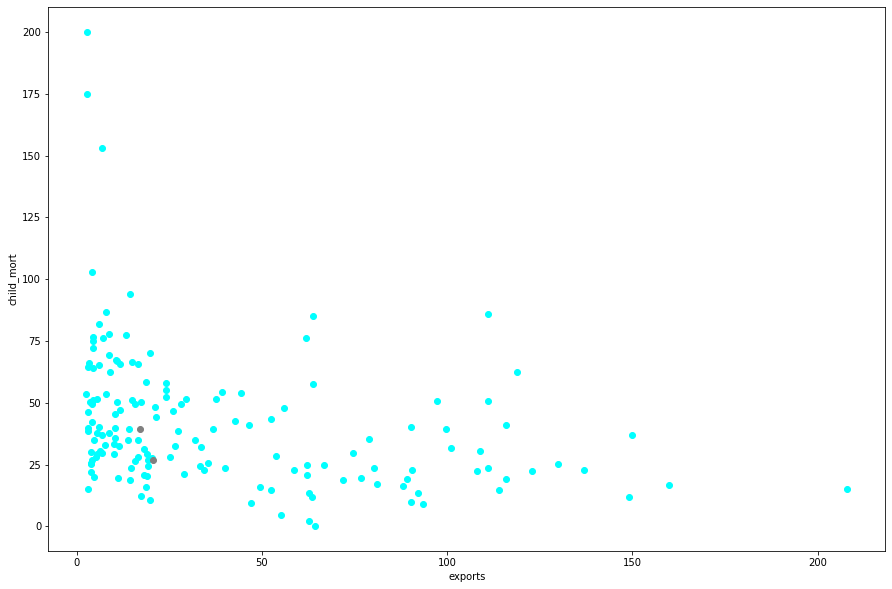

In [38]:
colors = ["cyan", "red", "yellow", "green", "blue", "purple", "pink", "olive", "orange", "red", "yellow", "green", "blue", "purple", "pink", "olive", "oragne", "cyan"]
df_values = df_original.values.tolist()

plt.figure(figsize=(15, 10))
for p, c in zip(df_values, clustering.labels_):
    if c == -1:
        color = "gray"
    else:
        color = colors[c]
    plt.scatter(p[1], p[2], color=color)
plt.ylabel("child_mort")
plt.xlabel("exports")
plt.show()